In [1]:
def get_data(path):
    with open(path, 'r') as file:
        data = [json.loads(line) for line in file]
    return data

def get_accuracy(arr):
    count = 0
    correct = 0
    for ans in arr:
        if ans['answer'] == ans['gold_ans_char']:
            correct += 1
        count += 1
    return (correct / count) * 100

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import json
from collections import defaultdict
import os
import math

# First ones

## Char and Digits CoT

In [3]:
llama_8b_first_char_cot = get_data("first_ones/llama3.1_8b-instruct/zero-shot_chat_first_v0/500_char_cot_seed-5.jsonl")
llama_70b_first_char_cot  = get_data("first_ones/llama3.3_70b-instruct/zero-shot_chat_first_v0/500_char_cot_seed-5.jsonl")
olmo_7b_first_char_cot = get_data("first_ones/OLMo_7B-instruct/zero-shot_chat_first_v0/500_char_cot_seed-5.jsonl") 

llama_8b_first_digit_cot = get_data("first_ones/llama3.1_8b-instruct/zero-shot_chat_first_v0/500_char_cot_seed-5.jsonl")
llama_70b_first_digit_cot = get_data("first_ones/llama3.3_70b-instruct/zero-shot_chat_first_v0/500_char_cot_seed-5.jsonl")
olmo_7b_first_digit_cot = get_data("first_ones/OLMo_7B-instruct/zero-shot_chat_first_v0/500_char_cot_seed-5.jsonl") 

In [4]:
llama_8b_acc_first_char_cot = get_accuracy(llama_8b_first_char_cot)
llama_70b_acc_first_char_cot = get_accuracy(llama_70b_first_char_cot)
olmo_7b_acc_first_char_cot = get_accuracy(olmo_7b_first_char_cot)

llama_8b_acc_first_digit_cot = get_accuracy(llama_8b_first_digit_cot)
llama_70b_acc_first_digit_cot = get_accuracy(llama_70b_first_digit_cot)
olmo_7b_acc_first_digit_cot = get_accuracy(olmo_7b_first_digit_cot)

## Char and Digits No CoT

In [5]:
llama_8b_first_char_nocot = get_data("first_ones/llama3.1_8b-instruct/zero-shot_chat_first_v0/500_char_nocot_seed-5.jsonl")
llama_70b_first_char_nocot  = get_data("first_ones/llama3.3_70b-instruct/zero-shot_chat_first_v0/500_char_nocot_seed-5.jsonl")
olmo_7b_first_char_nocot = get_data("first_ones/OLMo_7B-instruct/zero-shot_chat_first_v0/500_char_nocot_seed-5.jsonl") 

llama_8b_first_digit_nocot = get_data("first_ones/llama3.1_8b-instruct/zero-shot_chat_first_v0/500_char_nocot_seed-5.jsonl")
llama_70b_first_digit_nocot = get_data("first_ones/llama3.3_70b-instruct/zero-shot_chat_first_v0/500_char_nocot_seed-5.jsonl")
olmo_7b_first_digit_nocot = get_data("first_ones/OLMo_7B-instruct/zero-shot_chat_first_v0/500_char_nocot_seed-5.jsonl") 

In [6]:
llama_8b_acc_first_char_nocot = get_accuracy(llama_8b_first_char_nocot)
llama_70b_acc_first_char_nocot = get_accuracy(llama_70b_first_char_nocot)
olmo_7b_acc_first_char_nocot = get_accuracy(olmo_7b_first_char_nocot)

llama_8b_acc_first_digit_nocot = get_accuracy(llama_8b_first_digit_nocot)
llama_70b_acc_first_digit_nocot = get_accuracy(llama_70b_first_digit_nocot)
olmo_7b_acc_first_digit_nocot = get_accuracy(olmo_7b_first_digit_nocot)

# Last ones

## Char and Digits CoT

In [7]:
llama_8b_last_char_cot = get_data("last_ones/llama3.1_8b-instruct/zero-shot_chat_last_v0/500_char_cot_seed-5.jsonl")
llama_70b_last_char_cot  = get_data("last_ones/llama3.3_70b-instruct/zero-shot_chat_last_v0/500_char_cot_seed-5.jsonl")
olmo_7b_last_char_cot = get_data("last_ones/OLMo_7B-instruct/zero-shot_chat_last_v0/500_char_cot_seed-5.jsonl") 

llama_8b_last_digit_cot = get_data("last_ones/llama3.1_8b-instruct/zero-shot_chat_last_v0/500_char_cot_seed-5.jsonl")
llama_70b_last_digit_cot = get_data("last_ones/llama3.3_70b-instruct/zero-shot_chat_last_v0/500_char_cot_seed-5.jsonl")
olmo_7b_last_digit_cot = get_data("last_ones/OLMo_7B-instruct/zero-shot_chat_last_v0/500_char_cot_seed-5.jsonl") 

In [8]:
llama_8b_acc_last_char_cot = get_accuracy(llama_8b_last_char_cot)
llama_70b_acc_last_char_cot = get_accuracy(llama_70b_last_char_cot)
olmo_7b_acc_last_char_cot = get_accuracy(olmo_7b_last_char_cot)

llama_8b_acc_last_digit_cot = get_accuracy(llama_8b_last_digit_cot)
llama_70b_acc_last_digit_cot = get_accuracy(llama_70b_last_digit_cot)
olmo_7b_acc_last_digit_cot = get_accuracy(olmo_7b_last_digit_cot)

## Char and Digits No CoT

In [9]:
llama_8b_last_char_nocot = get_data("last_ones/llama3.1_8b-instruct/zero-shot_chat_last_v0/500_char_nocot_seed-5.jsonl")
llama_70b_last_char_nocot  = get_data("last_ones/llama3.3_70b-instruct/zero-shot_chat_last_v0/500_char_nocot_seed-5.jsonl")
olmo_7b_last_char_nocot = get_data("last_ones/OLMo_7B-instruct/zero-shot_chat_last_v0/500_char_nocot_seed-5.jsonl") 

llama_8b_last_digit_nocot = get_data("last_ones/llama3.1_8b-instruct/zero-shot_chat_last_v0/500_char_nocot_seed-5.jsonl")
llama_70b_last_digit_nocot = get_data("last_ones/llama3.3_70b-instruct/zero-shot_chat_last_v0/500_char_nocot_seed-5.jsonl")
olmo_7b_last_digit_nocot = get_data("last_ones/OLMo_7B-instruct/zero-shot_chat_last_v0/500_char_nocot_seed-5.jsonl") 

In [10]:
llama_8b_acc_last_char_nocot = get_accuracy(llama_8b_last_char_nocot)
llama_70b_acc_last_char_nocot = get_accuracy(llama_70b_last_char_nocot)
olmo_7b_acc_last_char_nocot = get_accuracy(olmo_7b_last_char_nocot)

llama_8b_acc_last_digit_nocot = get_accuracy(llama_8b_last_digit_nocot)
llama_70b_acc_last_digit_nocot = get_accuracy(llama_70b_last_digit_nocot)
olmo_7b_acc_last_digit_nocot = get_accuracy(olmo_7b_last_digit_nocot)

# Flip-Flop

In [11]:
llama_8b_flipflop_fw_lc_cot = get_data("flipflop/llama3.1_8B-instruct/flipflop_zero-shot_chat_v0/500_cot_fw-lc_seed-5.jsonl")
llama_8b_flipflop_fw_lc_nocot = get_data("flipflop/llama3.1_8B-instruct/flipflop_zero-shot_chat_v0/500_nocot_fw-lc_seed-5.jsonl")
llama_8b_flipflop_fw_rc_cot = get_data("flipflop/llama3.1_8B-instruct/flipflop_zero-shot_chat_v0/500_cot_fw-rc_seed-5.jsonl")
llama_8b_flipflop_fw_rc_nocot = get_data("flipflop/llama3.1_8B-instruct/flipflop_zero-shot_chat_v0/500_nocot_fw-rc_seed-5.jsonl")
llama_8b_flipflop_lw_lc_cot = get_data("flipflop/llama3.1_8B-instruct/flipflop_zero-shot_chat_v0/500_cot_fw-lc_seed-5.jsonl")
llama_8b_flipflop_lw_lc_nocot = get_data("flipflop/llama3.1_8B-instruct/flipflop_zero-shot_chat_v0/500_nocot_lw-lc_seed-5.jsonl")
llama_8b_flipflop_lw_rc_cot = get_data("flipflop/llama3.1_8B-instruct/flipflop_zero-shot_chat_v0/500_cot_lw-rc_seed-5.jsonl")
llama_8b_flipflop_lw_rc_nocot = get_data("flipflop/llama3.1_8B-instruct/flipflop_zero-shot_chat_v0/500_nocot_lw-rc_seed-5.jsonl")

llama_70b_flipflop_fw_lc_cot = get_data("flipflop/llama3.3_70B-instruct/flipflop_zero-shot_chat_v0/500_cot_fw-lc_seed-5.jsonl")
llama_70b_flipflop_fw_lc_nocot = get_data("flipflop/llama3.3_70B-instruct/flipflop_zero-shot_chat_v0/500_nocot_fw-lc_seed-5.jsonl")
llama_70b_flipflop_fw_rc_cot = get_data("flipflop/llama3.3_70B-instruct/flipflop_zero-shot_chat_v0/500_cot_fw-rc_seed-5.jsonl")
llama_70b_flipflop_fw_rc_nocot = get_data("flipflop/llama3.3_70B-instruct/flipflop_zero-shot_chat_v0/500_nocot_fw-rc_seed-5.jsonl")
llama_70b_flipflop_lw_lc_cot = get_data("flipflop/llama3.3_70B-instruct/flipflop_zero-shot_chat_v0/500_cot_fw-lc_seed-5.jsonl")
llama_70b_flipflop_lw_lc_nocot = get_data("flipflop/llama3.3_70B-instruct/flipflop_zero-shot_chat_v0/500_nocot_lw-lc_seed-5.jsonl")
llama_70b_flipflop_lw_rc_cot = get_data("flipflop/llama3.3_70B-instruct/flipflop_zero-shot_chat_v0/500_cot_lw-rc_seed-5.jsonl")
llama_70b_flipflop_lw_rc_nocot = get_data("flipflop/llama3.3_70B-instruct/flipflop_zero-shot_chat_v0/500_nocot_lw-rc_seed-5.jsonl")

olmo_7b_flipflop_fw_lc_cot = get_data("flipflop/OLMo_7B-instruct/flipflop_zero-shot_chat_v0/500_cot_fw-lc_seed-5.jsonl")
olmo_7b_flipflop_fw_lc_nocot = get_data("flipflop/OLMo_7B-instruct/flipflop_zero-shot_chat_v0/500_nocot_fw-lc_seed-5.jsonl")
olmo_7b_flipflop_fw_rc_cot = get_data("flipflop/OLMo_7B-instruct/flipflop_zero-shot_chat_v0/500_cot_fw-rc_seed-5.jsonl")
olmo_7b_flipflop_fw_rc_nocot = get_data("flipflop/OLMo_7B-instruct/flipflop_zero-shot_chat_v0/500_nocot_fw-rc_seed-5.jsonl")
olmo_7b_flipflop_lw_lc_cot = get_data("flipflop/OLMo_7B-instruct/flipflop_zero-shot_chat_v0/500_cot_fw-lc_seed-5.jsonl")
olmo_7b_flipflop_lw_lc_nocot = get_data("flipflop/OLMo_7B-instruct/flipflop_zero-shot_chat_v0/500_nocot_lw-lc_seed-5.jsonl")
olmo_7b_flipflop_lw_rc_cot = get_data("flipflop/OLMo_7B-instruct/flipflop_zero-shot_chat_v0/500_cot_lw-rc_seed-5.jsonl")
olmo_7b_flipflop_lw_rc_nocot = get_data("flipflop/OLMo_7B-instruct/flipflop_zero-shot_chat_v0/500_nocot_lw-rc_seed-5.jsonl")

In [12]:
llama_acc_8b_flipflop_fw_lc_cot = get_accuracy(llama_8b_flipflop_fw_lc_cot)
llama_acc_8b_flipflop_fw_lc_nocot = get_accuracy(llama_8b_flipflop_fw_lc_nocot)
llama_acc_8b_flipflop_lw_lc_cot = get_accuracy(llama_8b_flipflop_lw_lc_cot)
llama_acc_8b_flipflop_lw_lc_nocot = get_accuracy(llama_8b_flipflop_lw_lc_nocot)
llama_acc_8b_flipflop_lw_rc_cot = get_accuracy(llama_8b_flipflop_lw_rc_cot)
llama_acc_8b_flipflop_lw_rc_nocot = get_accuracy(llama_8b_flipflop_lw_rc_nocot)
llama_acc_8b_flipflop_fw_rc_cot = get_accuracy(llama_8b_flipflop_fw_rc_cot)
llama_acc_8b_flipflop_fw_rc_nocot = get_accuracy(llama_8b_flipflop_fw_rc_nocot)

llama_acc_70b_flipflop_fw_lc_cot = get_accuracy(llama_70b_flipflop_fw_lc_cot)
llama_acc_70b_flipflop_fw_lc_nocot = get_accuracy(llama_70b_flipflop_fw_lc_nocot)
llama_acc_70b_flipflop_lw_lc_cot = get_accuracy(llama_70b_flipflop_lw_lc_cot)
llama_acc_70b_flipflop_lw_lc_nocot = get_accuracy(llama_70b_flipflop_lw_lc_nocot)
llama_acc_70b_flipflop_lw_rc_cot = get_accuracy(llama_70b_flipflop_lw_rc_cot)
llama_acc_70b_flipflop_lw_rc_nocot = get_accuracy(llama_70b_flipflop_lw_rc_nocot)
llama_acc_70b_flipflop_fw_rc_cot = get_accuracy(llama_70b_flipflop_fw_rc_cot)
llama_acc_70b_flipflop_fw_rc_nocot = get_accuracy(llama_70b_flipflop_fw_rc_nocot)

olmo_acc_7b_flipflop_fw_lc_cot = get_accuracy(olmo_7b_flipflop_fw_lc_cot)
olmo_acc_7b_flipflop_fw_lc_nocot = get_accuracy(olmo_7b_flipflop_fw_lc_nocot)
olmo_acc_7b_flipflop_lw_lc_cot = get_accuracy(olmo_7b_flipflop_lw_lc_cot)
olmo_acc_7b_flipflop_lw_lc_nocot = get_accuracy(olmo_7b_flipflop_lw_lc_nocot)
olmo_acc_7b_flipflop_lw_rc_cot = get_accuracy(olmo_7b_flipflop_lw_rc_cot)
olmo_acc_7b_flipflop_lw_rc_nocot = get_accuracy(olmo_7b_flipflop_lw_rc_nocot)
olmo_acc_7b_flipflop_fw_rc_cot = get_accuracy(olmo_7b_flipflop_fw_rc_cot)
olmo_acc_7b_flipflop_fw_rc_nocot = get_accuracy(olmo_7b_flipflop_fw_rc_nocot)

# Induction Head

In [25]:
llama_8b_ind_after_cot = get_data("flipflop_inductionhead/llama3.1_8B-instruct/inductionhead_zero-shot_chat_v0/500_after_cot_seed-5.jsonl")[:-100]
llama_8b_ind_after_nocot = get_data("flipflop_inductionhead/llama3.1_8B-instruct/inductionhead_zero-shot_chat_v0/500_after_nocot_seed-5.jsonl")[:-100]
llama_8b_ind_before_cot = get_data("flipflop_inductionhead/llama3.1_8B-instruct/inductionhead_zero-shot_chat_v0/500_before_cot_seed-5.jsonl")[:-100]
llama_8b_ind_before_nocot = get_data("flipflop_inductionhead/llama3.1_8B-instruct/inductionhead_zero-shot_chat_v0/500_before_nocot_seed-5.jsonl")[:-100]

llama_70b_ind_after_cot = get_data("flipflop_inductionhead/llama3.3_70B-instruct/inductionhead_zero-shot_chat_v0/500_after_cot_seed-5.jsonl")[:-100]
llama_70b_ind_after_nocot = get_data("flipflop_inductionhead/llama3.3_70B-instruct/inductionhead_zero-shot_chat_v0/500_after_nocot_seed-5.jsonl")[:-100]
llama_70b_ind_before_cot = get_data("flipflop_inductionhead/llama3.3_70B-instruct/inductionhead_zero-shot_chat_v0/500_before_cot_seed-5.jsonl")[:-100]
llama_70b_ind_before_nocot = get_data("flipflop_inductionhead/llama3.3_70B-instruct/inductionhead_zero-shot_chat_v0/500_before_nocot_seed-5.jsonl")[:-100]

olmo_7b_ind_after_cot = get_data("flipflop_inductionhead/OLMo_7B-instruct/inductionhead_zero-shot_chat_v0/500_after_cot_seed-5.jsonl")[:-100]
olmo_7b_ind_after_nocot = get_data("flipflop_inductionhead/OLMo_7B-instruct/inductionhead_zero-shot_chat_v0/500_after_nocot_seed-5.jsonl")[:-100]
olmo_7b_ind_before_cot = get_data("flipflop_inductionhead/OLMo_7B-instruct/inductionhead_zero-shot_chat_v0/500_before_cot_seed-5.jsonl")[:-100]
olmo_7b_ind_before_nocot = get_data("flipflop_inductionhead/OLMo_7B-instruct/inductionhead_zero-shot_chat_v0/500_before_nocot_seed-5.jsonl")[:-100]

In [26]:
llama_8b_acc_ind_after_cot = get_accuracy(llama_8b_ind_after_cot)
llama_8b_acc_ind_after_nocot = get_accuracy(llama_8b_ind_after_nocot)
llama_8b_acc_ind_before_cot = get_accuracy(llama_8b_ind_before_cot)
llama_8b_acc_ind_before_nocot = get_accuracy(llama_8b_ind_before_nocot)

llama_70b_acc_ind_after_cot = get_accuracy(llama_70b_ind_after_cot)
llama_70b_acc_ind_after_nocot = get_accuracy(llama_70b_ind_after_nocot)
llama_70b_acc_ind_before_cot = get_accuracy(llama_70b_ind_before_cot)
llama_70b_acc_ind_before_nocot = get_accuracy(llama_70b_ind_before_nocot)

olmo_7b_acc_ind_after_cot = get_accuracy(olmo_7b_ind_after_cot)
olmo_7b_acc_ind_after_nocot = get_accuracy(olmo_7b_ind_after_nocot)
olmo_7b_acc_ind_before_cot = get_accuracy(olmo_7b_ind_before_cot)
olmo_7b_acc_ind_before_nocot = get_accuracy(olmo_7b_ind_before_nocot)

# Data

In [36]:
data = {
    'Llama3.1_8b-instruct':
    {
        'First Retrieval': {
            'CoT': (llama_8b_acc_first_char_cot + llama_8b_acc_first_digit_cot) / 2,
            'No CoT': (llama_8b_acc_first_char_nocot + llama_8b_acc_first_digit_nocot) / 2
        },
        'Last Retrieval': {
            'CoT': (llama_8b_acc_last_char_cot + llama_8b_acc_last_digit_cot) / 2,
            'No CoT': (llama_8b_acc_last_char_nocot + llama_8b_acc_last_digit_nocot) / 2
        },
        'Induction Head After':
        {
            'CoT': olmo_7b_acc_ind_after_cot,
            'No CoT': olmo_7b_acc_ind_after_nocot
        },
        'Induction Head Before':
        {
            'CoT': olmo_7b_acc_ind_before_cot,
            'No CoT': olmo_7b_acc_ind_before_nocot
        },
        'Flip-Flop FwLc': {
            'CoT': llama_acc_8b_flipflop_fw_lc_cot,
            'No CoT': llama_acc_8b_flipflop_fw_lc_nocot
        },
        'Flip-Flop FwRc': {
            'CoT': llama_acc_8b_flipflop_fw_rc_cot,
            'No CoT': llama_acc_8b_flipflop_fw_rc_nocot
        },
        'Flip-Flop LwLc': {
            'CoT': llama_acc_8b_flipflop_lw_lc_cot,
            'No CoT': llama_acc_8b_flipflop_lw_lc_nocot
        },
        'Flip-Flop LwRc': {
            'CoT': llama_acc_8b_flipflop_lw_rc_cot,
            'No CoT': llama_acc_8b_flipflop_lw_rc_nocot
        }
        
    },
    'Llama3.3_70b-instruct':
    {
        'First Retrieval': {
            'CoT': (llama_70b_acc_first_char_cot + llama_8b_acc_first_digit_cot) / 2,
            'No CoT': (llama_70b_acc_first_char_nocot + llama_8b_acc_first_digit_nocot) / 2
        },
        'Last Retrieval': {
            'CoT': (llama_70b_acc_last_char_cot + llama_8b_acc_last_digit_cot) / 2,
            'No CoT': (llama_70b_acc_last_char_nocot + llama_8b_acc_last_digit_nocot) /2
        },
        'Induction Head After':
        {
            'CoT': llama_70b_acc_ind_after_cot,
            'No CoT': llama_70b_acc_ind_after_nocot
        },
        'Induction Head Before':
        {
            'CoT': llama_70b_acc_ind_before_cot,
            'No CoT': llama_70b_acc_ind_before_nocot
        },
        'Flip-Flop FwLc': {
            'CoT': llama_acc_70b_flipflop_fw_lc_cot,
            'No CoT': llama_acc_70b_flipflop_fw_lc_nocot
        },
        'Flip-Flop FwRc': {
            'CoT': llama_acc_70b_flipflop_fw_rc_cot,
            'No CoT': llama_acc_70b_flipflop_fw_rc_nocot
        },
        'Flip-Flop LwLc': {
            'CoT': llama_acc_70b_flipflop_lw_lc_cot,
            'No CoT': llama_acc_70b_flipflop_lw_lc_nocot
        },
        'Flip-Flop LwRc': {
            'CoT': llama_acc_70b_flipflop_lw_rc_cot,
            'No CoT': llama_acc_70b_flipflop_lw_rc_nocot
        }
    },
    'OLMo_7b-instruct':
    {
        'First Retrieval': {
            'CoT': (olmo_7b_acc_first_char_cot + olmo_7b_acc_first_digit_cot) /2,
            'No CoT': (olmo_7b_acc_first_char_nocot + olmo_7b_acc_first_digit_nocot) /2
        },
        'Last Retrieval': {
            'CoT': (olmo_7b_acc_last_char_cot + olmo_7b_acc_last_digit_cot) / 2,
            'No CoT': (olmo_7b_acc_last_char_nocot + olmo_7b_acc_last_digit_nocot)/2
        },
        'Induction Head After':
        {
            'CoT': olmo_7b_acc_ind_after_cot,
            'No CoT': olmo_7b_acc_ind_after_nocot
        },
        'Induction Head Before':
        {
            'CoT': olmo_7b_acc_ind_before_cot,
            'No CoT': olmo_7b_acc_ind_before_nocot
        },
        'Flip-Flop FwLc': {
            'CoT': olmo_acc_7b_flipflop_fw_lc_cot,
            'No CoT': olmo_acc_7b_flipflop_fw_lc_nocot
        },
        'Flip-Flop FwRc': {
            'CoT': olmo_acc_7b_flipflop_fw_rc_cot,
            'No CoT': olmo_acc_7b_flipflop_fw_rc_nocot
        },
        'Flip-Flop LwLc': {
            'CoT': olmo_acc_7b_flipflop_lw_lc_cot,
            'No CoT': olmo_acc_7b_flipflop_lw_lc_nocot
        },
        'Flip-Flop LwRc': {
            'CoT': olmo_acc_7b_flipflop_lw_rc_cot,
            'No CoT': olmo_acc_7b_flipflop_lw_rc_nocot
        }
    },
}

# Plot all together

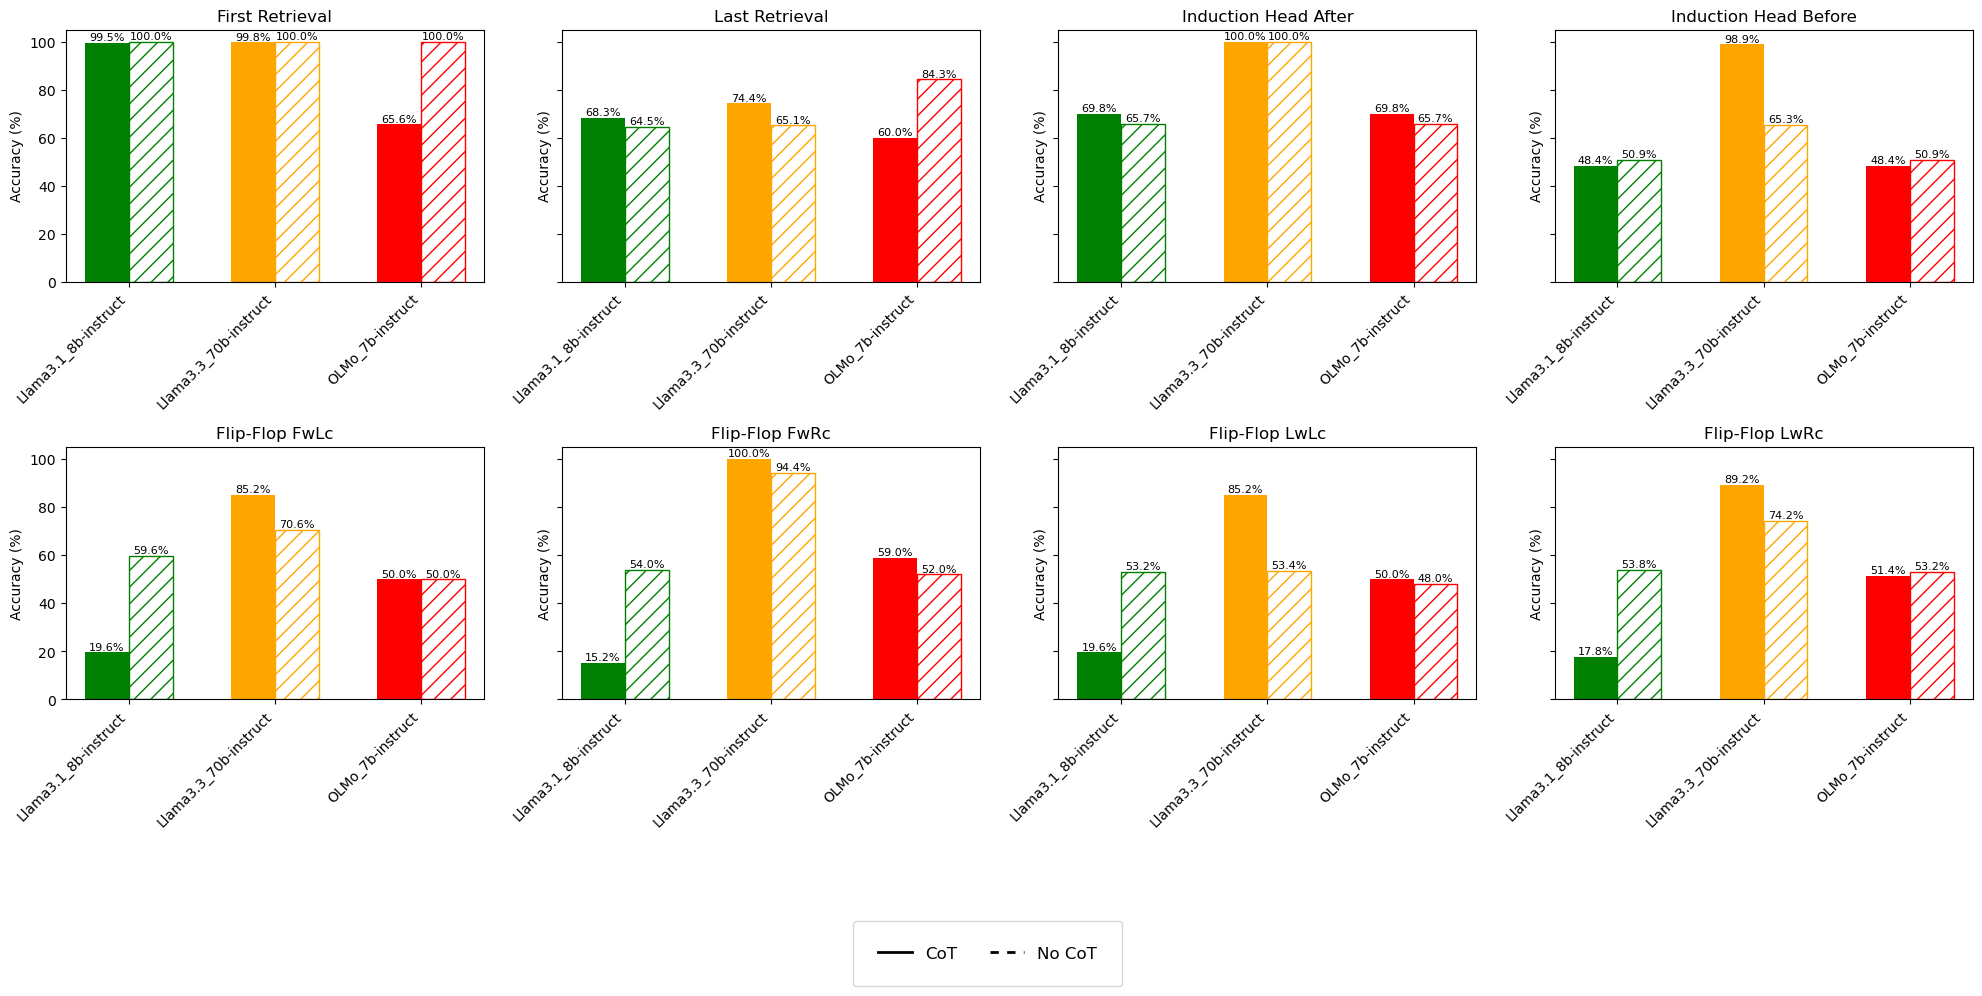

In [40]:
models = list(data.keys())
tasks = list(data[models[0]].keys())
variations = ['CoT', 'No CoT']
colors = {'Llama3.1_8b-instruct': 'green', 'Llama3.3_70b-instruct': 'orange', 'OLMo_7b-instruct': 'red'}

n_tasks = len(tasks)
n_cols = math.ceil(n_tasks / 2)  # Two rows
n_rows = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10), sharey=True)
axes = axes.flatten()  # Flatten to simplify indexing
bar_width = 0.3

for i, (task, ax) in enumerate(zip(tasks, axes)):
    x = np.arange(len(models))
    
    main_values = [data[model][task]['CoT'] for model in models]
    alt_values = [data[model][task]['No CoT'] for model in models]
    
    ax.bar(x - bar_width/2, main_values, bar_width, color=[colors[model] for model in models], label='CoT')
    ax.bar(x + bar_width/2, alt_values, bar_width, hatch='//', edgecolor=[colors[model] for model in models], facecolor='none', label='No CoT')
    
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=45, ha='right')
    ax.set_title(task)
    ax.set_ylabel('Accuracy (%)')
    
    for j in range(len(models)):
        ax.text(x[j] - bar_width/2, main_values[j] + 1, f'{main_values[j]:.1f}%', ha='center', fontsize=8)
        ax.text(x[j] + bar_width/2, alt_values[j] + 1, f'{alt_values[j]:.1f}%', ha='center', fontsize=8)

# Remove extra empty subplots if tasks are not evenly divisible by 2
for i in range(n_tasks, len(axes)):
    fig.delaxes(axes[i])

# Adjust legend placement
legend_handles = [
    plt.Line2D([0], [0], color='black', lw=2, label='CoT'),
    plt.Line2D([0], [0], color='black', lw=2, linestyle=(0, (3, 3)), label='No CoT')
]
fig.legend(handles=legend_handles, loc='lower center', ncol=2, fontsize=12, borderpad=1.5, bbox_to_anchor=(0.5, -0.05))

plt.tight_layout(rect=[0, 0.1, 1, 0.95])  # Adjust spacing for legend
plt.savefig("task_results.png", dpi=300, bbox_inches='tight')
plt.show()


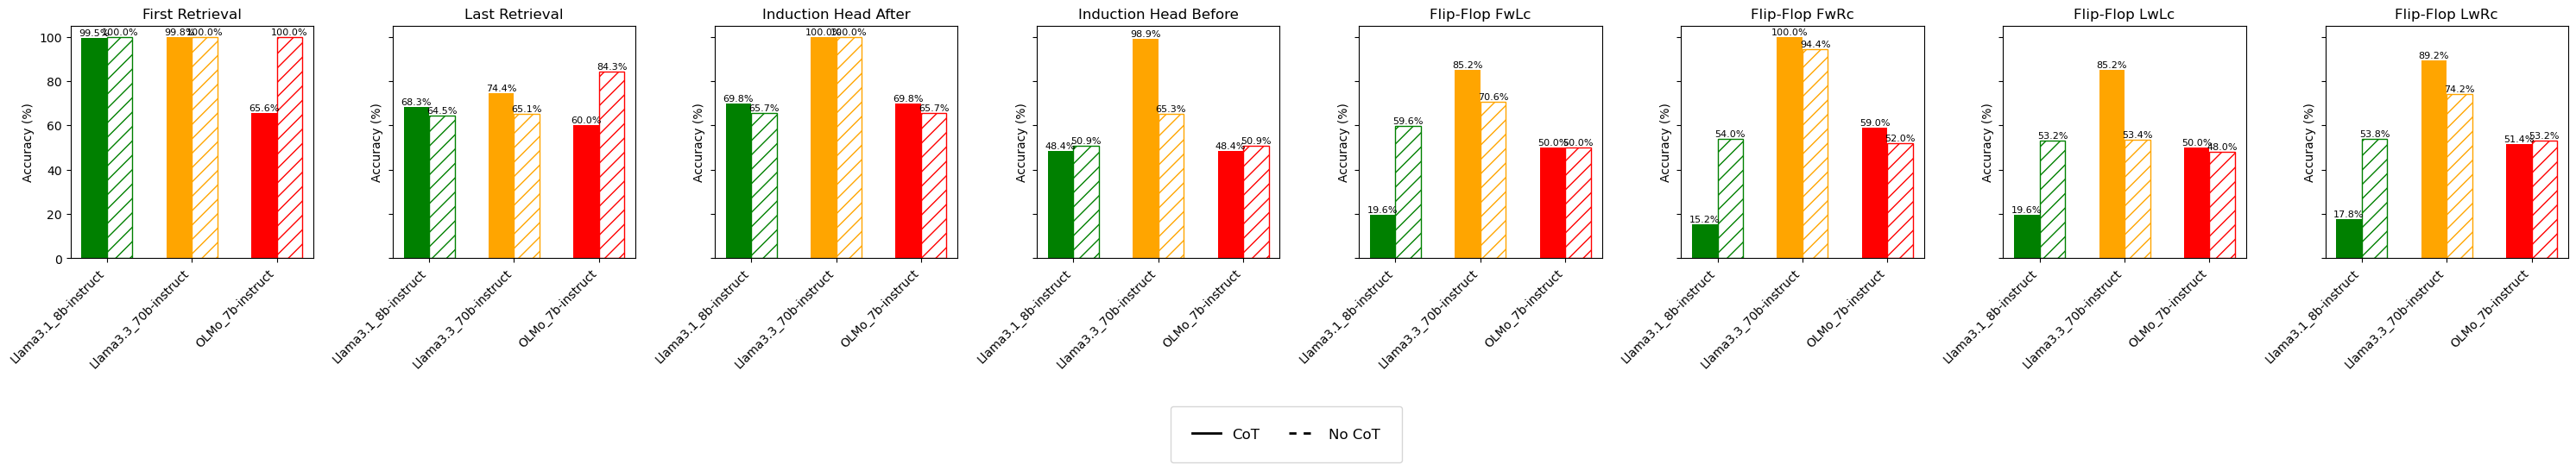

In [42]:
fig, axes = plt.subplots(1, len(tasks), figsize=(30, 5), sharey=True)
bar_width = 0.3

for i, (task, ax) in enumerate(zip(tasks, axes)):
    x = np.arange(len(models))
    
    main_values = [data[model][task]['CoT'] for model in models]
    alt_values = [data[model][task]['No CoT'] for model in models]
    
    ax.bar(x - bar_width/2, main_values, bar_width, color=[colors[model] for model in models], label='CoT')
    ax.bar(x + bar_width/2, alt_values, bar_width, hatch='//', edgecolor=[colors[model] for model in models], facecolor='none', label='No CoT')
    
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=45, ha='right')
    ax.set_title(task)
    ax.set_ylabel('Accuracy (%)')
    
    for j in range(len(models)):
        ax.text(x[j] - bar_width/2, main_values[j] + 1, f'{main_values[j]:.1f}%', ha='center', fontsize=8)
        ax.text(x[j] + bar_width/2, alt_values[j] + 1, f'{alt_values[j]:.1f}%', ha='center', fontsize=8)
    
legend_handles = [
    plt.Line2D([0], [0], color='black', lw=2, label='CoT'),
    plt.Line2D([0], [0], color='black', lw=2, linestyle=(0, (3, 3)), label='No CoT')
]
fig.legend(handles=legend_handles, loc='lower center', ncol=2, fontsize=12, borderpad=1.5, bbox_to_anchor=(0.5, -0.15))

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.savefig("task_results.png", dpi=300, bbox_inches='tight')
plt.show()
